In [1]:
# Mounting colab on drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
# Enter the folder name
FOLDER_NAME = '/content/drive/My Drive/IndianData/Posts/'

Mounted at /content/drive


In [2]:
# Extracting files from JSON

import os
import json

countF = 0
countI = 0

InstaPostList = []

for folder in os.listdir(FOLDER_NAME):
    if folder==".ipynb_checkpoints":
        continue
    foldername = FOLDER_NAME + folder
    print(foldername + "Started..... :)")
    for file in os.listdir(foldername):
        if file==".ipynb_checkpoints":
            continue
        with open(foldername+"/"+file, "r") as f:
            posts = f.readlines()
            for post in posts:
                post = json.loads(post)
                try:
                    for postF in post['result']['posts']:
                        if postF['platform']=="Instagram":
                            InstaPostList.append(postF)
                except:
                    continue

/content/drive/My Drive/IndianData/Posts/_साल_50_निर्णयStarted..... :)
/content/drive/My Drive/IndianData/Posts/4yrsofsudarshannewsStarted..... :)
/content/drive/My Drive/IndianData/Posts/aafniyatsahivikasStarted..... :)
/content/drive/My Drive/IndianData/Posts/4yearsofrssStarted..... :)
/content/drive/My Drive/IndianData/Posts/aalekayushmananekStarted..... :)
/content/drive/My Drive/IndianData/Posts/4monthsofsuraajStarted..... :)
/content/drive/My Drive/IndianData/Posts/afailgandhiStarted..... :)
/content/drive/My Drive/IndianData/Posts/agannathStarted..... :)
/content/drive/My Drive/IndianData/Posts/aamdarkasammanStarted..... :)
/content/drive/My Drive/IndianData/Posts/adalrahihaikashiStarted..... :)
/content/drive/My Drive/IndianData/Posts/adharomharepmStarted..... :)
/content/drive/My Drive/IndianData/Posts/acebookboomedStarted..... :)
/content/drive/My Drive/IndianData/Posts/awlessodishaStarted..... :)
/content/drive/My Drive/IndianData/Posts/agafailonrafaleStarted..... :)
/conten

In [3]:
# Removing duplicate posts

IdDict = set()
newList = []

for post in InstaPostList:
    if post['platformId'] in IdDict:
        continue
    else:
        newList.append(post)
        IdDict.add(post['platformId'])

InstaPostList = newList

In [4]:
# Monthly Post analysis
from datetime import datetime

MonthlyPost = dict()

for post in InstaPostList:
    month = datetime.strptime(post['date'], "%Y-%m-%d %H:%M:%S")
    month = "{}-{}-01".format(month.year, month.month)
    if month in MonthlyPost:
        MonthlyPost[month] += 1
    else:
        MonthlyPost[month] = 0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

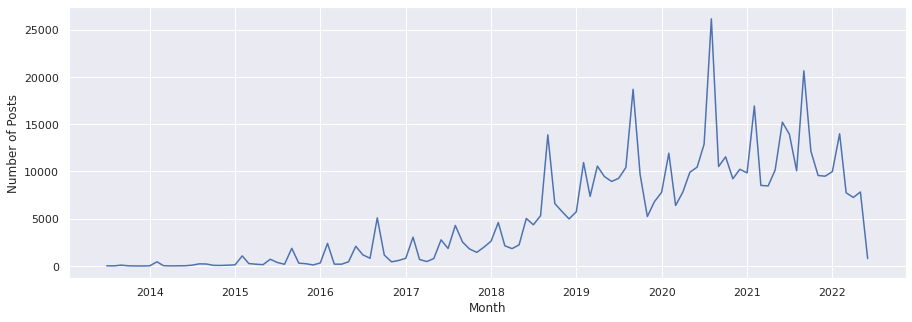

In [6]:
MonthlyPostDF = pd.DataFrame({
    "Month" : [datetime.strptime(date, "%Y-%m-%d") for date in MonthlyPost.keys()],
    "Number of Posts" : [val for val in MonthlyPost.values()]
})
plt.figure(figsize = (15,5))
sns.lineplot(x="Month", y="Number of Posts", data=MonthlyPostDF)

In [7]:
# Popular accounts/pages

Accounts = dict()

for post in InstaPostList:
    if post['account']['handle'] not in Accounts.keys():
        Accounts[post['account']['handle']] = {
            "subscriberCount" : post['account']['subscriberCount'],
            "postCount" : 0
        }
    Accounts[post['account']['handle']]['subscriberCount'] = max(Accounts[post['account']['handle']]['subscriberCount'], post['account']['subscriberCount'])
    Accounts[post['account']['handle']]['postCount'] += 1

In [8]:
AccountsSubs = {k: v for k, v in sorted(Accounts.items(), key=lambda item: item[1]['subscriberCount'], reverse=True)[:15]}

for accn in AccountsSubs.keys():
    print("Account - {}, Subscriber Count - {}, Post Count - {}".format(accn, AccountsSubs[accn]['subscriberCount'], AccountsSubs[accn]['postCount']))

Account - virat.kohli, Subscriber Count - 200777946, Post Count - 1
Account - gal_gadot, Subscriber Count - 82738024, Post Count - 1
Account - nehakakkar, Subscriber Count - 70181386, Post Count - 1
Account - narendramodi, Subscriber Count - 68036885, Post Count - 13
Account - tomholland2013, Subscriber Count - 67266909, Post Count - 1
Account - maluma, Subscriber Count - 62594077, Post Count - 1
Account - akshaykumar, Subscriber Count - 62478991, Post Count - 6
Account - raffinagita1717, Subscriber Count - 62436667, Post Count - 2
Account - jacquelinef143, Subscriber Count - 61513101, Post Count - 1
Account - anushkasharma, Subscriber Count - 59076847, Post Count - 1
Account - sunnyleone, Subscriber Count - 53013853, Post Count - 3
Account - urvashirautela, Subscriber Count - 52707365, Post Count - 9
Account - kritisanon, Subscriber Count - 49395771, Post Count - 2
Account - prillylatuconsina96, Subscriber Count - 48096673, Post Count - 1
Account - hrithikroshan, Subscriber Count - 43

In [9]:
AccountsPosts = {k: v for k, v in sorted(Accounts.items(), key=lambda item: item[1]['postCount'], reverse=True)[:15]}

for accn in AccountsPosts.keys():
    print("Account - {}, Subscriber Count - {}, Post Count - {}".format(accn, AccountsPosts[accn]['subscriberCount'], AccountsPosts[accn]['postCount']))

Account - bjpfanclub.56inch, Subscriber Count - 277619, Post Count - 9927
Account - chhatrapati_shivaji_maharaja, Subscriber Count - 185997, Post Count - 4785
Account - myfirstvote4modi, Subscriber Count - 80333, Post Count - 4555
Account - indian_army_supporter__, Subscriber Count - 519442, Post Count - 4245
Account - the_great_maratha._, Subscriber Count - 88813, Post Count - 4207
Account - krishna.realfriend, Subscriber Count - 82678, Post Count - 3724
Account - chhatrapati.shivaji_maharaj, Subscriber Count - 116241, Post Count - 3326
Account - shiv_shahi_96k, Subscriber Count - 84369, Post Count - 3229
Account - aamhi_marathi_p, Subscriber Count - 53192, Post Count - 3194
Account - the_royal_maratha, Subscriber Count - 176573, Post Count - 3054
Account - doordarshanuttarpradesh, Subscriber Count - 1881, Post Count - 3041
Account - bjp_hindustan, Subscriber Count - 134921, Post Count - 2914
Account - shivaji_maharaj_history, Subscriber Count - 361112, Post Count - 2835
Account - bjp

In [10]:
# Overall word analysis

from gensim.parsing.preprocessing import remove_stopwords
import re

wordCount = dict()

for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n'," ")
    text = text.replace('\t'," ")
    text = text.lower()
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    words = res.split()
    for word in words:
        if(len(word) <= 1):
            continue
        if word not in wordCount.keys():
            wordCount[word] = 0
        wordCount[word] += 1

In [11]:
wordCountSorted = sorted(wordCount, key=wordCount.get, reverse=True)

In [12]:
wordCountSorted[:15]

['कर',
 'follow',
 'जय',
 'वर',
 'shivajimaharaj',
 'india',
 'मह',
 'maharashtra',
 'पर',
 'रत',
 'mumbai',
 'marathi',
 'narendramodi',
 'आण',
 'ganeshchaturthi']

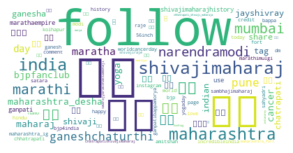

In [13]:
# Word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

txt = ""
for word in wordCount.keys():
    for i in range(wordCount[word]):
        txt += word + " "

plt.figure(figsize = (5,5))
word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=100).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# Hashtag freuqency
import re

all_hashtags = dict()
hashtag_re = re.compile("#\w+ ")

for post in InstaPostList:
    try:
        line = post['message']
    except:
        try:
            line = post['description']
        except:
            continue 
    try:
        line = line.strip();
        line = line.lower();
    except:
        continue;
    tweet = line;
    hashtags = re.findall(hashtag_re,tweet);
    if(len(hashtags)>0):
        for hashtag in hashtags:
            hashtag = hashtag.strip();
            if(len(hashtag)<3):
                continue;
            if hashtag in all_hashtags.keys():
                all_hashtags[hashtag] += 1
            else:
                all_hashtags[hashtag] = 1

In [15]:
all_hashtags = {k:v for k,v in sorted(all_hashtags.items(), key=lambda item: item[1], reverse=True)}

In [16]:
all_hashtags

{'#shivajimaharaj': 113665,
 '#maharashtra': 94710,
 '#india': 89895,
 '#mumbai': 72806,
 '#marathi': 66736,
 '#ganeshchaturthi': 62889,
 '#pune': 59647,
 '#maratha': 49078,
 '#maharaj': 44069,
 '#jayshivray': 42568,
 '#narendramodi': 40498,
 '#maharashtra_desha': 39020,
 '#sahyadri': 34344,
 '#maharashtra_ig': 34091,
 '#shivaji': 32820,
 '#shivajimaharajhistory': 32513,
 '#bjp': 32370,
 '#yogaday': 31039,
 '#ganesha': 29358,
 '#kolhapur': 29342,
 '#chatrapati': 29077,
 '#ganpati': 27340,
 '#sambhajimaharaj': 26695,
 '#marathaempire': 26400,
 '#worldcancerday': 25554,
 '#ganpatibappamorya': 25188,
 '#raje': 24829,
 '#incredibleindia': 22289,
 '#instagram': 22052,
 '#indian': 21691,
 '#amitshah': 21532,
 '#history': 21500,
 '#bappa': 20493,
 '#hindu': 20398,
 '#marathistatus': 20221,
 '#indianarmy': 20030,
 '#yoga': 19968,
 '#satara': 19329,
 '#marathimulgi': 18962,
 '#yogiadityanath': 18758,
 '#ganpatibappa': 18550,
 '#maharashtradesha': 18149,
 '#nashik': 18031,
 '#love': 17620,
 '#ch

In [17]:
# URL Frequency
URLs = dict()

for post in InstaPostList:
  try:
    post = post['expandedLinks']

    for link in post:
      url = link['original']
      if url not in URLs.keys():
        URLs[url] = 0
      URLs[url] += 1
  except:
    continue

In [18]:
URLs = {k:v for k,v in sorted(URLs.items(), key=lambda item:item[1], reverse=True)}

In [19]:
URLs

{'www.tirumalahills.org': 664,
 'www.facebook.com/tirumalahills': 661,
 'https://youtube.com/channel/UCZ_x8VpTeDEOui4ZIMc7BKA': 320,
 'https://Twitter.com/BJP4Gujarat': 207,
 'http://Youtube.com/BJP4Gujarat': 207,
 'http://Facebook.com/BJP4Gujarat': 205,
 'www.ns7.tv': 153,
 'facebook.com/BJP4India': 147,
 'www.worldcancerday.org': 142,
 'https://gitaquest.in/donate': 134,
 'https://www.facebook.com/SwarajyaRakshakSambhaji/': 132,
 'www.cancerinformation.com.hk': 111,
 'youtube.com/BJP4India': 105,
 'Twitter.com/BJP4Gujarat': 85,
 'Facebook.com/BJP4Gujarat': 81,
 'Youtube.com/BJP4Gujarat': 78,
 'pscp.tv/BJP4India': 73,
 'https://www.worldcancerday.org/': 71,
 'http://bit.ly/WorldCancerDayWalk2018SignUp': 67,
 'http://bit.ly/WorldCancerDay2019Walk': 66,
 'www.etvbharat.com': 65,
 'https://goo.gl/qV9RZt': 64,
 'https://goo.gl/V54UUw': 64,
 'ndtv.com/swasthindia': 64,
 'https://tentcitynarmada.com/': 63,
 'www.instagram.com/cancer_information': 63,
 'mewe.com/p/cancerinformationhk': 63,
 

In [20]:
# Reach analysis
favCount = []
CommentCount = []

for post in InstaPostList:
  try:
    favCount.append(post['statistics']['actual']['favoriteCount'])
    CommentCount.append(post['statistics']['actual']['commentCount'])
  except:
    continue
    
import statistics 

print("Favorite count - Mean = {}, Median = {}, Standard Deviation = {}, Max = {}".format(statistics.mean(favCount), statistics.median(favCount), statistics.stdev(favCount), max(favCount)))
print("Comment count - Mean = {}, Median = {}, Standard Deviation = {}, Max = {}".format(statistics.mean(CommentCount), statistics.median(CommentCount), statistics.stdev(CommentCount), max(CommentCount)))

Favorite count - Mean = 2223.007964531824, Median = 465, Standard Deviation = 12488.934862594251, Max = 2478203
Comment count - Mean = 19.831695270726073, Median = 3, Standard Deviation = 151.33116385115338, Max = 41117


In [21]:
# Word vector analysis

from gensim.models import Word2Vec
import os
import json
import re
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
sentences = []

for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n'," ")
    text = text.replace('\t'," ")
    text = text.lower()
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt = []
    words = res.split()
    for word in words:
        if(len(word) <= 1):
            continue
        txt.append(word)
    sentences.append(txt)

In [23]:
model = Word2Vec(sentences=sentences, window=5, min_count=1, workers=4)

In [24]:
IntialWordList = ["asian", "virus", "coronavirus", "chinese"]

In [25]:
for word in IntialWordList:
    sims = model.wv.most_similar(word, topn=10)
    print("----------------------------------------------------")
    print("Word similar to {}: ".format(word))
    for word, score in sims:
        print("Word - {}, Similarity score - {}".format(word, score))
    print("----------------------------------------------------")

----------------------------------------------------
Word similar to asian: 
Word - category, Similarity score - 0.8769015669822693
Word - junior, Similarity score - 0.8626712560653687
Word - african, Similarity score - 0.860461950302124
Word - ranked, Similarity score - 0.8532035946846008
Word - medals, Similarity score - 0.8478712439537048
Word - japan, Similarity score - 0.8467966318130493
Word - league, Similarity score - 0.8443665504455566
Word - chinese, Similarity score - 0.8399204611778259
Word - ireland, Similarity score - 0.838887095451355
Word - england, Similarity score - 0.8341113924980164
----------------------------------------------------
----------------------------------------------------
Word similar to virus: 
Word - hpv, Similarity score - 0.7772539854049683
Word - infection, Similarity score - 0.7679586410522461
Word - hepatitis, Similarity score - 0.766923725605011
Word - pandemic, Similarity score - 0.7649412155151367
Word - isolation, Similarity score - 0.75911

In [26]:
import networkx as nx
from numpy import dot
from numpy.linalg import norm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [27]:
!pip3 install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
numLevel = 2
thres = 0.5

G = nx.Graph()

def makeGraph(words, lev=2):
    for word in words:
        if word not in G.nodes():
            G.add_node(word)
            sims = model.wv.most_similar(word, topn=10)
            newWordList = []
            for wordN,sim in sims:
                if sim>thres:
                    newWordList.append(wordN)
            if lev>0:
                makeGraph(newWordList, lev-1)
                for wordN, sim in sims:
                    if sim>thres:
                        G.add_edge(word, wordN, weight=sim)
    return

In [29]:
makeGraph(IntialWordList)
G = G.to_undirected()
partitionLev2 = community_louvain.best_partition(G)

In [30]:
ns = []
for node in G.nodes():
    ns.append(wordCount[node])
mns = statistics.mean(ns)
for i in range(len(ns)):
    ns[i] /= mns

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119848 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119855 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119842 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 119810 missing from current font.
  fon

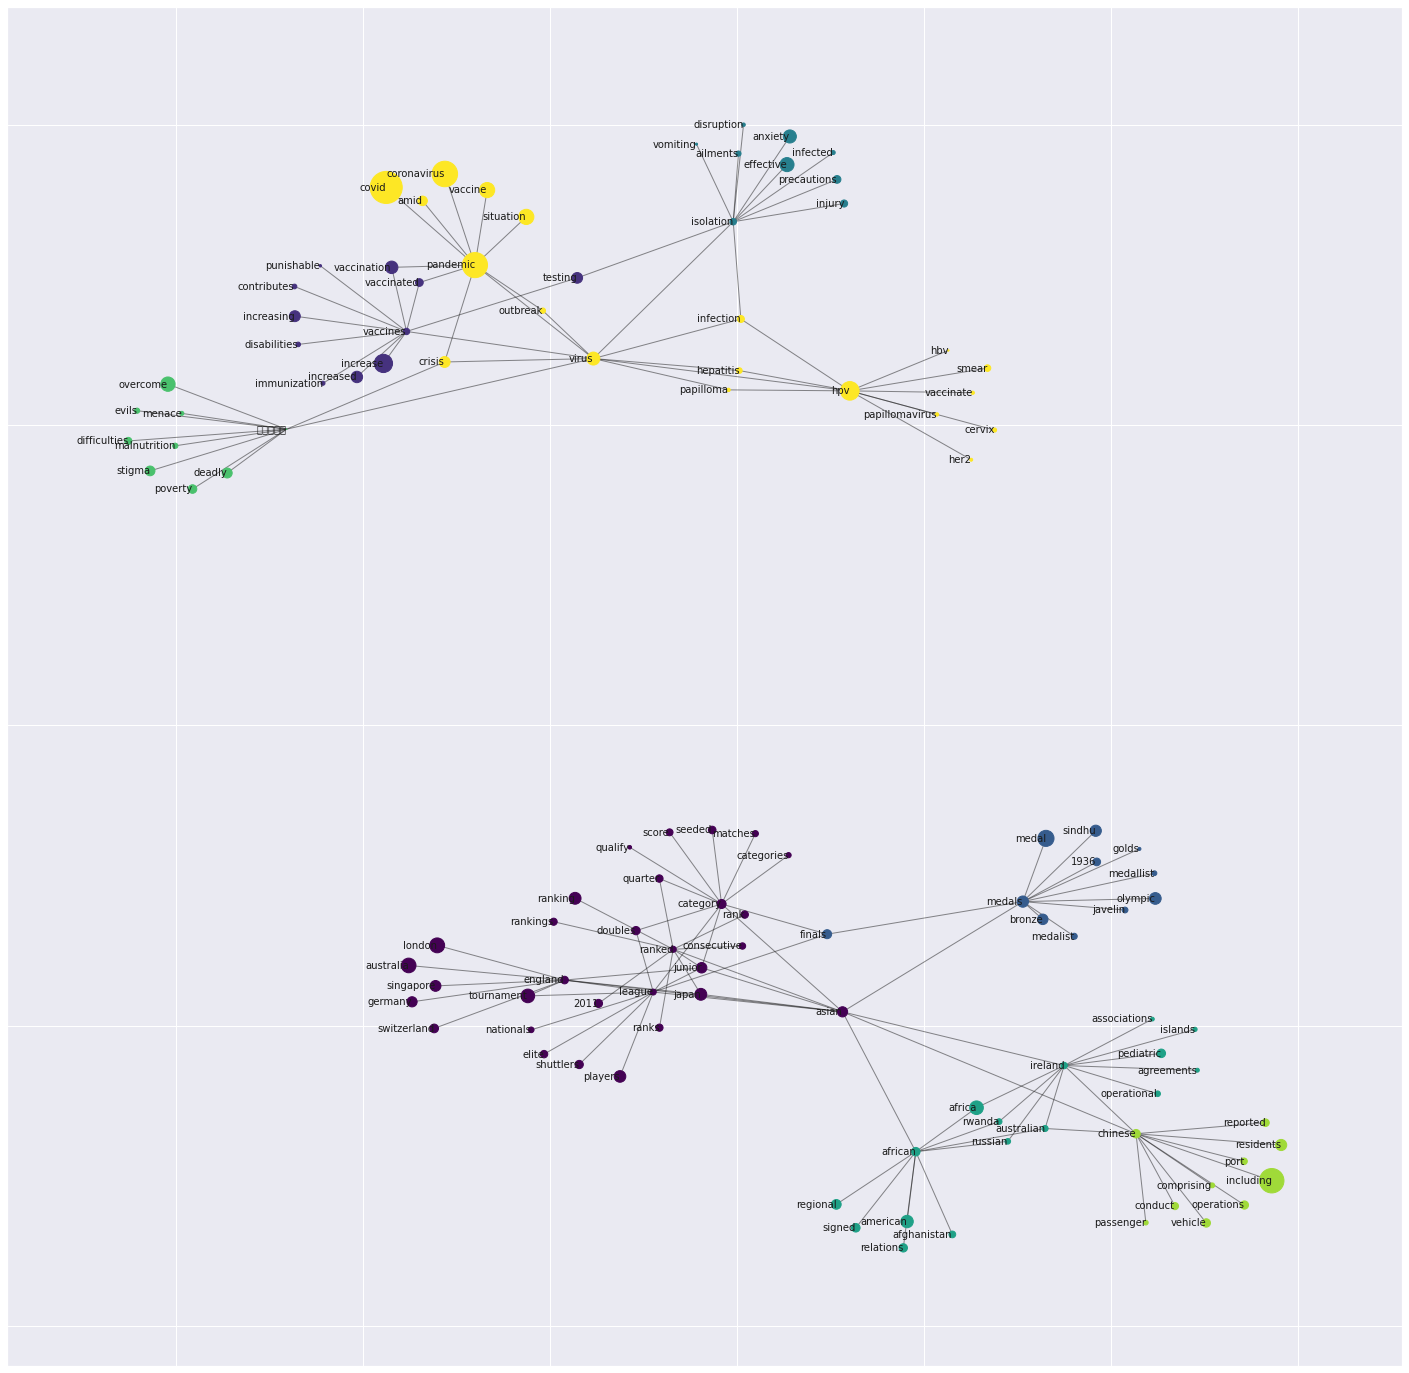

In [31]:
pos = nx.spring_layout(G)
plt.figure(figsize = (25,25))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitionLev2.values()) + 1)
nx.draw_networkx_nodes(G, pos, partitionLev2.keys(), node_size=[100*x for x in ns], cmap=cmap, node_color=list(partitionLev2.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, horizontalalignment="right")
plt.show()

In [33]:
# Topic modelling

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10
# Build LDA model
warnings.simplefilter("ignore")
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

In [41]:
# Hashtag co-ocurrence analysis

currhashs = [k for (k,v) in all_hashtags.items() if v>1000]

CorrCount = dict()
for hashtag in currhashs:
    CorrCount[hashtag] = dict()
    for hashtag2 in currhashs:
        if hashtag!=hashtag2:
            CorrCount[hashtag][hashtag2] = 0

In [42]:
hashtag_re = re.compile("#\w+ ")

for post in InstaPostList:
    try:
        line = post['message']
    except:
        try:
            line = post['description']
        except:
            continue 
    try:
        line = line.strip();
        line = line.lower();
    except:
        continue;
    tweet = line;
    hashtags = re.findall(hashtag_re,tweet);
    if(len(hashtags)>0):
        for hashtag in hashtags:
            hashorig = hashtag
            hashtag = hashtag.strip();
            if len(hashtag)<3:
                hashtags.remove(hashorig)
        for hashtag1 in hashtags:
            for hashtag2 in hashtags:
                hashtag1 = hashtag1.strip()
                hashtag2 = hashtag2.strip()
                if hashtag1!=hashtag2 and (hashtag1 in currhashs) and (hashtag2 in currhashs):
                    CorrCount[hashtag1][hashtag2] += 1

In [43]:
import networkx as nx
from numpy import dot
from numpy.linalg import norm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [45]:
G = nx.Graph()

def makeGraph():
    for hashtag in currhashs:
        G.add_node(hashtag)
    for hashtag1 in currhashs:
        for hashtag2 in currhashs:
            if hashtag1!=hashtag2:
                if CorrCount[hashtag1][hashtag2]!=0:
                    weight = float(float(CorrCount[hashtag1][hashtag2]) / float(all_hashtags[hashtag1] * all_hashtags[hashtag2]))
                    G.add_edge(hashtag1, hashtag2, weight = weight)
    return

In [46]:
makeGraph()
G = G.to_undirected()
partitionLev2 = community_louvain.best_partition(G)

In [47]:
import statistics
import warnings

warnings.simplefilter("ignore")

ns = []
for node in G.nodes():
    ns.append(all_hashtags[node])
mns = statistics.mean(ns)
for i in range(len(ns)):
    ns[i] /= mns

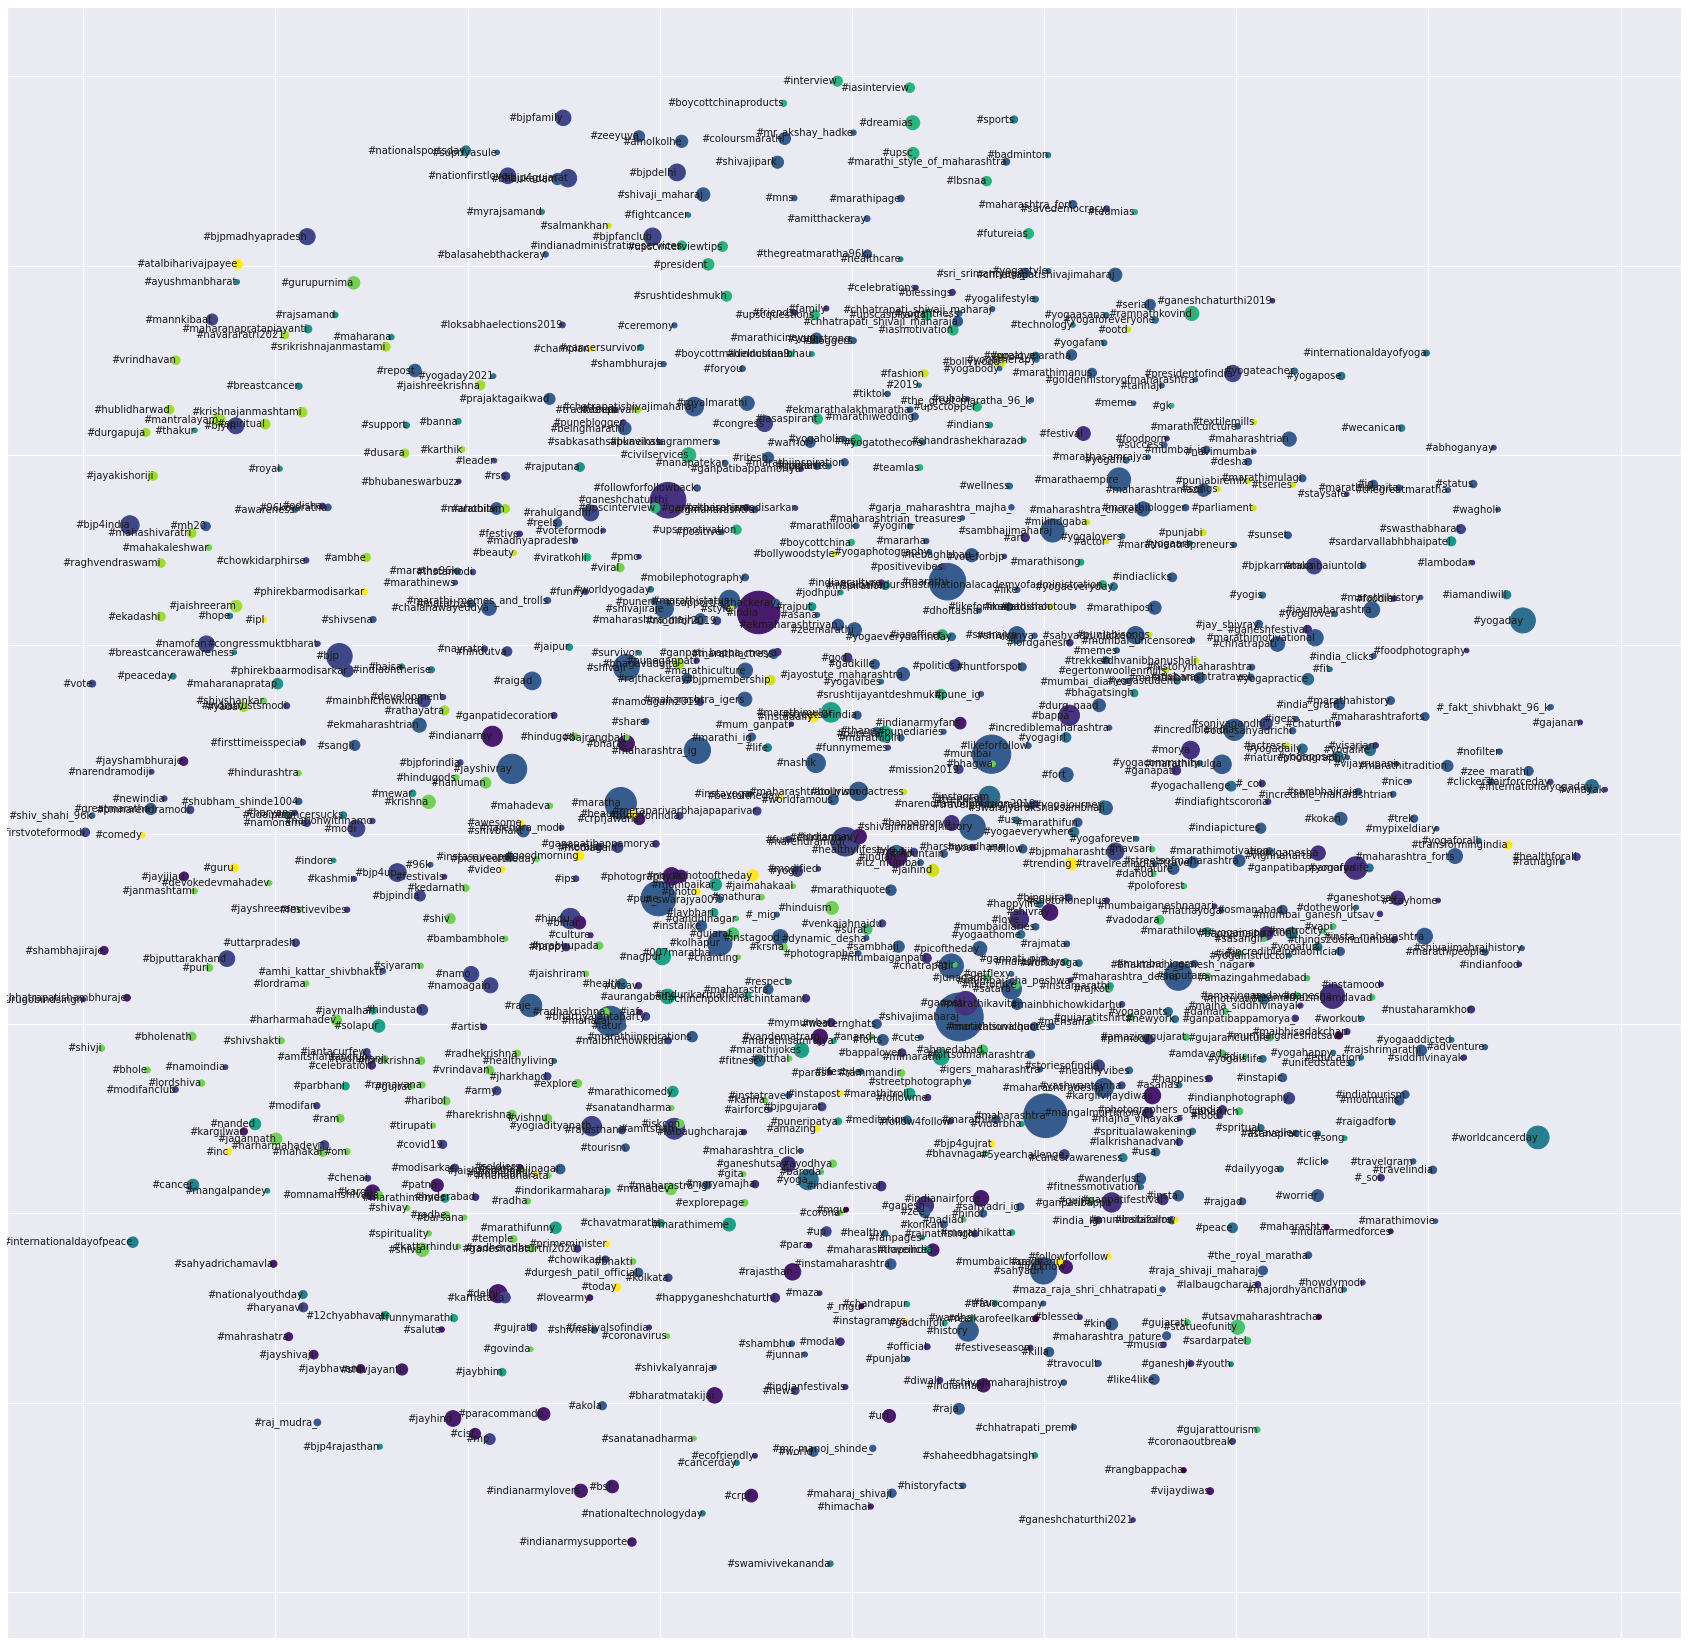

In [48]:
pos = nx.spring_layout(G)
plt.figure(figsize = (30,30))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitionLev2.values()) + 1)
nx.draw_networkx_nodes(G, pos, partitionLev2.keys(), node_size=[100*x for x in ns], cmap=cmap, node_color=list(partitionLev2.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, horizontalalignment="right")
plt.show()

In [53]:
numComms = 0
for key, value in partitionLev2.items():
    numComms = max(numComms, value+1)

print(numComms)

15


In [55]:
for i in range(0, numComms-1):
    print("Printing Community Number - {}".format(i))
    for key,value in partitionLev2.items():
        if(value==i):
            print(key)
    print("----------------------------------------")

Printing Community Number - 0
#mumbaiganeshutsav
#reelkarofeelkaro
#maharashta
#rangbappacha
#utsavmaharashtracha
#_mgu
#mgu
----------------------------------------
Printing Community Number - 1
#india
#indian
#indianarmy
#delhi
#photography
#kargilvijaydiwas
#rajasthan
#bharat
#shivray
#jayhind
#indianairforce
#bharatmatakijai
#vandematram
#kargil
#indiannavy
#indianflag
#indianarmylovers
#lucknow
#uri
#bihar
#crpf
#patna
#paracommando
#bsf
#iloveindia
#noida
#indianarmyfans
#crpfjawans
#shivjayanti
#cisf
#jayjijau
#jayshivaji
#jayshambhuraje
#indianarmysupporter
#jaybhavani
#shambhajiraje
#mahrashatra
#kargilwar
#sahyadrichamavla
#vijaydiwas
#chhatrapatishambhuraje
#lovearmy
#para
#salute
#iaf
#himachal
#soldiers
#indianarmedforces
#parasf
----------------------------------------
Printing Community Number - 2
#ganeshchaturthi
#ganesha
#ganpati
#ganpatibappamorya
#bappa
#ganpatibappa
#love
#morya
#ganesh
#ganeshutsav
#bappamorya
#lordganesha
#ganeshotsav
#festival
#bappamajha
#ganpat

In [49]:
# Post language analysis

languageCount = dict()

for post in InstaPostList:
    langCode = post["languageCode"]
    if langCode not in languageCount.keys():
        languageCount[langCode] = 0
    languageCount[langCode]+=1

In [50]:
languageCount = {k:v for k,v in sorted(languageCount.items(), key=lambda item:item[1], reverse=True)}

languageCount

{'af': 23,
 'ar': 1406,
 'az': 26,
 'bg': 12,
 'bn': 1659,
 'bs': 8,
 'ca': 82,
 'ceb': 14,
 'co': 43,
 'cs': 60,
 'cy': 20,
 'da': 139,
 'de': 717,
 'el': 190,
 'en': 188477,
 'eo': 93,
 'es': 2469,
 'et': 48,
 'eu': 10,
 'fa': 264,
 'fi': 69,
 'fr': 745,
 'fy': 75,
 'ga': 3,
 'gd': 19,
 'gl': 29,
 'gu': 13639,
 'ha': 32,
 'haw': 95,
 'hi': 78502,
 'hmn': 7,
 'hr': 32,
 'ht': 8,
 'hu': 34,
 'hy': 1,
 'id': 2376,
 'ig': 22,
 'is': 3,
 'it': 770,
 'iw': 8,
 'ja': 214,
 'jw': 1327,
 'kk': 3,
 'km': 8,
 'kn': 1264,
 'ko': 21,
 'ku': 6,
 'ky': 1,
 'la': 35,
 'lb': 30,
 'lt': 18,
 'lv': 9,
 'mg': 8,
 'mi': 129,
 'mk': 5,
 'ml': 630,
 'mn': 3,
 'mr': 68544,
 'ms': 269,
 'mt': 28,
 'ne': 1337,
 'nl': 187,
 'no': 131,
 'ny': 55,
 'or': 549,
 'pa': 677,
 'pl': 64,
 'ps': 6,
 'pt': 1306,
 'ro': 37,
 'ru': 471,
 'rw': 27,
 'sd': 1,
 'si': 6,
 'sk': 13,
 'sl': 39,
 'sm': 59,
 'sn': 64,
 'so': 80,
 'sq': 20,
 'st': 75,
 'su': 17,
 'sv': 131,
 'sw': 102,
 'ta': 1722,
 'te': 1457,
 'tg': 1,
 'th': 46